<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Investment_Strategy_Evaluation_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_days = 252  # Number of trading days in a year
n_years = 5   # Simulation over 5 years
n_total = n_days * n_years

# Generate random price data for each strategy
def generate_price_data(mean_return, volatility, start_price=100):
    """Generates simulated price data for an investment strategy."""
    daily_returns = np.random.normal(mean_return / n_days, volatility / np.sqrt(n_days), n_total)
    price = start_price * np.cumprod(1 + daily_returns)  # Cumulative returns
    return price

# Simulated data for each strategy (values based on hypothetical assumptions)
value_prices = generate_price_data(mean_return=0.08, volatility=0.12)  # Value investing
growth_prices = generate_price_data(mean_return=0.12, volatility=0.20)  # Growth investing
index_prices = generate_price_data(mean_return=0.07, volatility=0.10)  # Index funds
etf_prices = generate_price_data(mean_return=0.09, volatility=0.15)  # ETFs

# Create a DataFrame for easy manipulation
dates = pd.date_range(start='2018-01-01', periods=n_total, freq='B')  # Business days
df = pd.DataFrame({
    'Date': dates,
    'Value Investing': value_prices,
    'Growth Investing': growth_prices,
    'Index Funds': index_prices,
    'ETFs': etf_prices
})
df.set_index('Date', inplace=True)


In [4]:
# Calculate daily returns for each strategy
df['Value Daily Return'] = df['Value Investing'].pct_change()
df['Growth Daily Return'] = df['Growth Investing'].pct_change()
df['Index Daily Return'] = df['Index Funds'].pct_change()
df['ETF Daily Return'] = df['ETFs'].pct_change()

# Calculate average annual return (assuming 252 trading days)
annual_returns = {
    'Value Investing': df['Value Daily Return'].mean() * 252,
    'Growth Investing': df['Growth Daily Return'].mean() * 252,
    'Index Funds': df['Index Daily Return'].mean() * 252,
    'ETFs': df['ETF Daily Return'].mean() * 252
}

print("Annual Returns:")
print(annual_returns)


Annual Returns:
{'Value Investing': 0.15192008562747122, 'Growth Investing': 0.20659226238447945, 'Index Funds': 0.08304626281069902, 'ETFs': -0.02313032589475534}


In [5]:
# Calculate annualized volatility (standard deviation)
annual_volatility = {
    'Value Investing': df['Value Daily Return'].std() * np.sqrt(252),
    'Growth Investing': df['Growth Daily Return'].std() * np.sqrt(252),
    'Index Funds': df['Index Daily Return'].std() * np.sqrt(252),
    'ETFs': df['ETF Daily Return'].std() * np.sqrt(252)
}

print("Annual Volatility:")
print(annual_volatility)


Annual Volatility:
{'Value Investing': 0.11877791905168661, 'Growth Investing': 0.1957503665966567, 'Index Funds': 0.10258501558216328, 'ETFs': 0.14935473485386225}


In [6]:
risk_free_rate = 0.02

sharpe_ratios = {
    'Value Investing': (annual_returns['Value Investing'] - risk_free_rate) / annual_volatility['Value Investing'],
    'Growth Investing': (annual_returns['Growth Investing'] - risk_free_rate) / annual_volatility['Growth Investing'],
    'Index Funds': (annual_returns['Index Funds'] - risk_free_rate) / annual_volatility['Index Funds'],
    'ETFs': (annual_returns['ETFs'] - risk_free_rate) / annual_volatility['ETFs']
}

print("Sharpe Ratios:")
print(sharpe_ratios)


Sharpe Ratios:
{'Value Investing': 1.110644862956942, 'Growth Investing': 0.9532153917696231, 'Index Funds': 0.6145757492253189, 'ETFs': -0.2887777607918267}


In [7]:
# Calculate cumulative returns
df['Value Cumulative Return'] = (1 + df['Value Daily Return']).cumprod()
df['Growth Cumulative Return'] = (1 + df['Growth Daily Return']).cumprod()
df['Index Cumulative Return'] = (1 + df['Index Daily Return']).cumprod()
df['ETF Cumulative Return'] = (1 + df['ETF Daily Return']).cumprod()

# Calculate running maximum for each strategy
df['Value Running Max'] = df['Value Cumulative Return'].cummax()
df['Growth Running Max'] = df['Growth Cumulative Return'].cummax()
df['Index Running Max'] = df['Index Cumulative Return'].cummax()
df['ETF Running Max'] = df['ETF Cumulative Return'].cummax()

# Calculate drawdown
df['Value Drawdown'] = df['Value Cumulative Return'] / df['Value Running Max'] - 1
df['Growth Drawdown'] = df['Growth Cumulative Return'] / df['Growth Running Max'] - 1
df['Index Drawdown'] = df['Index Cumulative Return'] / df['Index Running Max'] - 1
df['ETF Drawdown'] = df['ETF Cumulative Return'] / df['ETF Running Max'] - 1

# Maximum drawdown
max_drawdown = {
    'Value Investing': df['Value Drawdown'].min(),
    'Growth Investing': df['Growth Drawdown'].min(),
    'Index Funds': df['Index Drawdown'].min(),
    'ETFs': df['ETF Drawdown'].min()
}

print("Maximum Drawdown:")
print(max_drawdown)


Maximum Drawdown:
{'Value Investing': -0.14679700127582473, 'Growth Investing': -0.18396413339463746, 'Index Funds': -0.1530521047344816, 'ETFs': -0.35819007880538667}


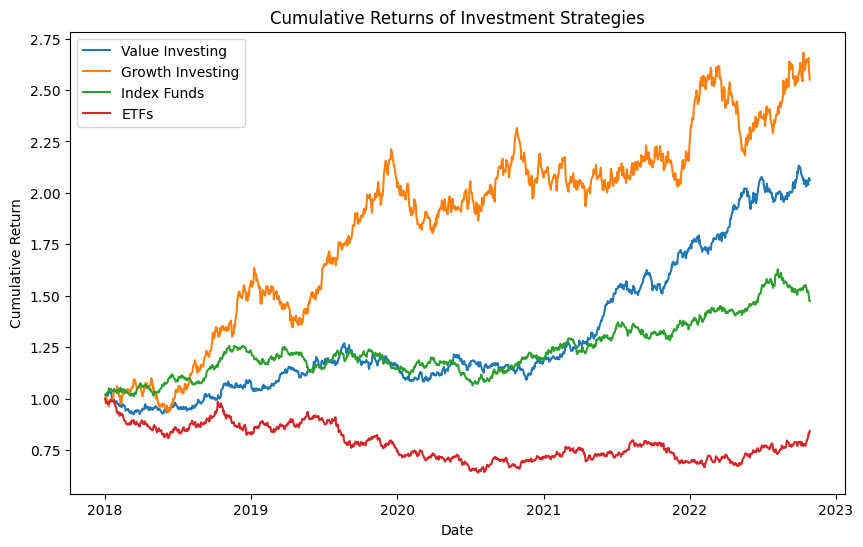

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Value Cumulative Return'], label='Value Investing')
plt.plot(df.index, df['Growth Cumulative Return'], label='Growth Investing')
plt.plot(df.index, df['Index Cumulative Return'], label='Index Funds')
plt.plot(df.index, df['ETF Cumulative Return'], label='ETFs')

plt.title('Cumulative Returns of Investment Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


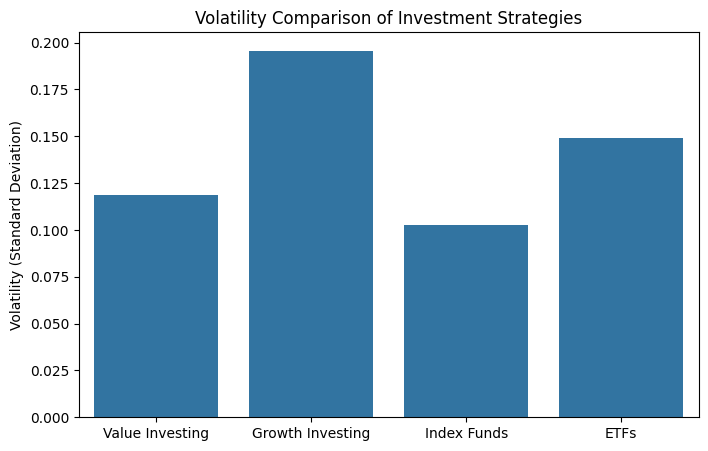

In [9]:
strategies = ['Value Investing', 'Growth Investing', 'Index Funds', 'ETFs']
volatilities = list(annual_volatility.values())

plt.figure(figsize=(8,5))
sns.barplot(x=strategies, y=volatilities)
plt.title('Volatility Comparison of Investment Strategies')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()
